## Challenge

As mentioned in the Compass, we will be using data from international football (soccer :)) matches that took place between 1872 and 2019 (148 years). You can download the dataset from [**this link**](https://drive.google.com/file/d/1cCn5botBKzh1XZOvrxpcLle-Ua7Fh9BR/view?usp=sharing) and find more information about it on [**Kaggle**](https://www.kaggle.com/martj42/international-football-results-from-1872-to-2017).

We need to make sure we understand all variables and information they store before we start working on the task. It's very important to understand the dataset to create meaningful visualizations.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

> #### Instruction
> Use visualizations to answer following questions. Try different Python packages.

## Task
Which teams scored the largest number of goals in FIFA World Cup?

In [2]:
df = pd.read_csv("C:/Users/Tim/Desktop/lighthouse/w3/d1,d2/results.csv")
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [19]:
home = ["home_team","home_score"]
away = ["away_team","away_score"]
dfhome = df[home].rename(columns={"home_team":"team","home_score":"score"})
dfaway = df[away].rename(columns={"away_team":"team","away_score":"score"})
scores = pd.concat([dfhome,dfaway])
scores = scores.groupby("team")["score"].sum()
scores = pd.DataFrame(scores)
scores.head()

,score
team,
Abkhazia,48
Afghanistan,114
Albania,305
Alderney,15
Algeria,707


In [31]:
scoressorted = scores.sort_values(by=['score'],ascending=False)
scoressortedtop = scoressorted[:20]
scoressortedtop.describe()

,score
count,20.000000
mean,1589.700000
std,323.055983
min,1199.000000
25%,1370.500000
50%,1454.500000
75%,1844.000000
max,2208.000000


<AxesSubplot:xlabel='score', ylabel='team'>

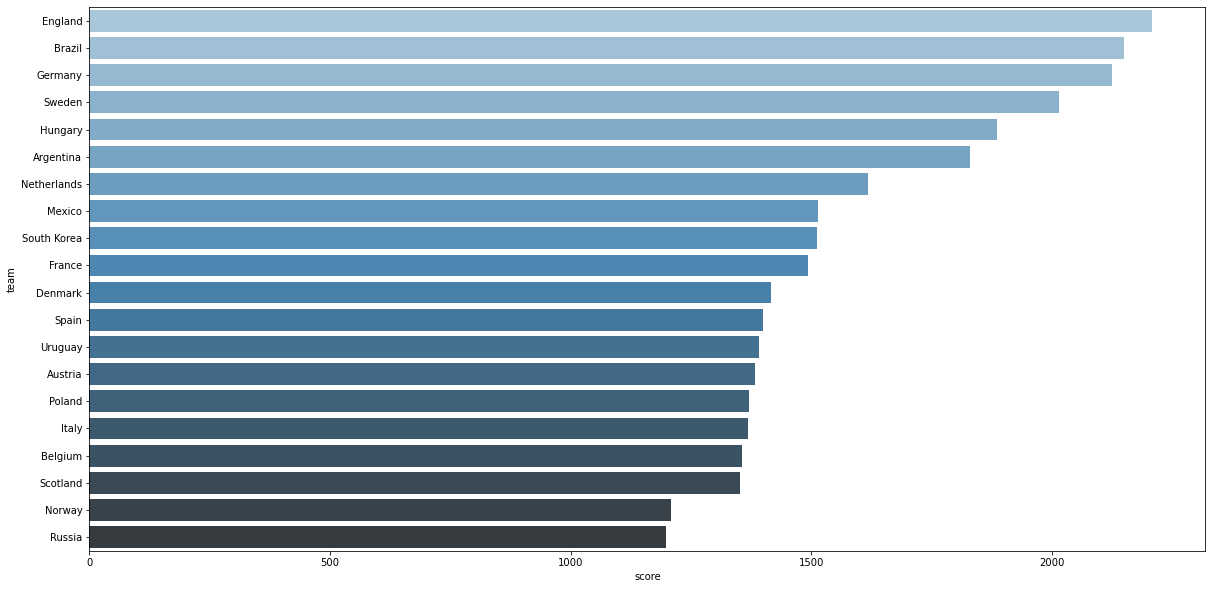

In [34]:
plt.figure(figsize=(20, 10))
sns.barplot(y=scoressortedtop.index,x='score',data=scoressortedtop,palette='Blues_d')


## Task
What is the number of matches played in each tournament throughout history?

In [35]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [50]:
tournaments = df.groupby('tournament')['date'].count()

#tournaments = pd.DataFrame(tournaments)
#tournaments = tournaments.rename(columns={"date":"count"})
#tournamentsorted = tournaments.sort_values(by='count',ascending=False)
#tournamentsorted = tournamentsorted.drop(index=['Friendly']) #friendly too big, 17k
tournamentsorted.head()

,count
tournament,
FIFA World Cup qualification,7236
UEFA Euro qualification,2582
African Cup of Nations qualification,1672
FIFA World Cup,900
Copa América,813


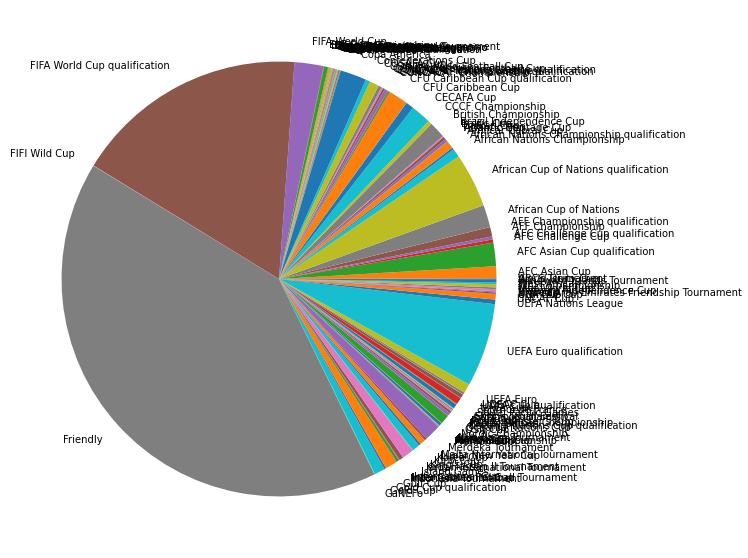

In [52]:
pie,ax = plt.subplots(figsize=(15,10))

labels = tournaments.index
plt.pie(x=tournaments, labels=labels, pctdistance=0.5)
plt.show()

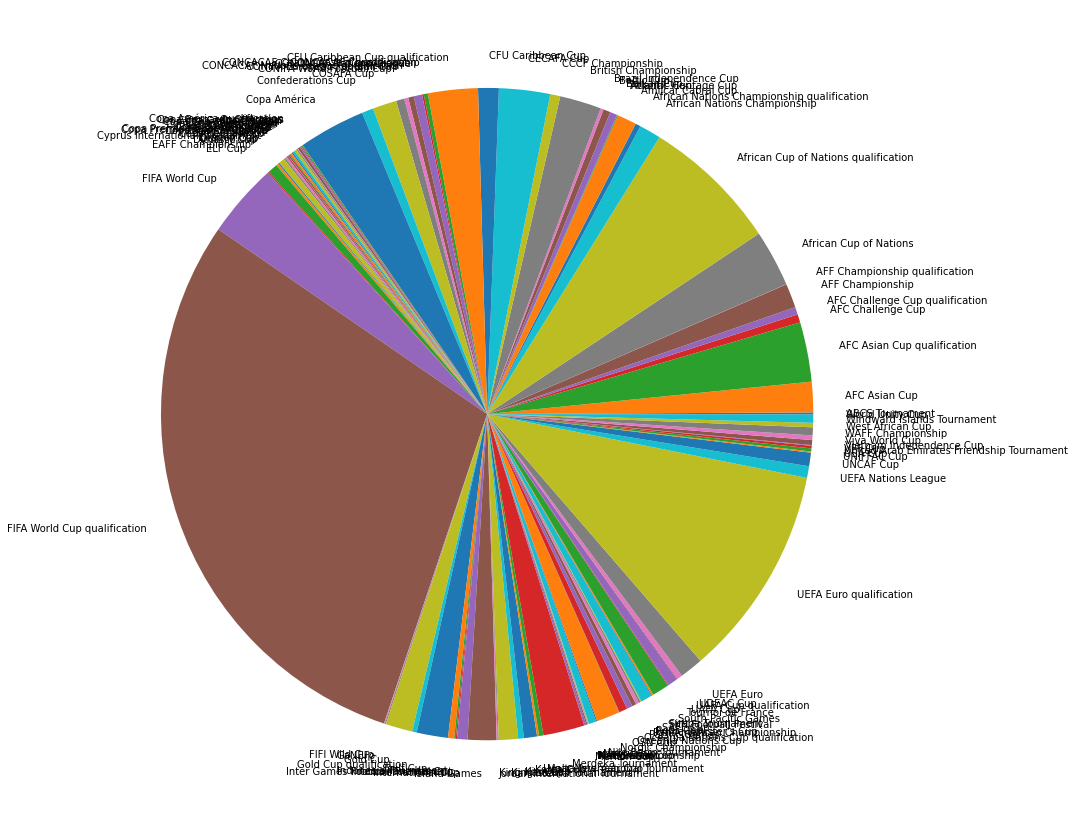

In [54]:
tournaments = tournaments.drop(index='Friendly')

pie,ax = plt.subplots(figsize=(20,15))
labels = tournaments.index
plt.pie(x=tournaments, labels=labels, pctdistance=0.5)
plt.show()

<AxesSubplot:xlabel='count', ylabel='tournament'>

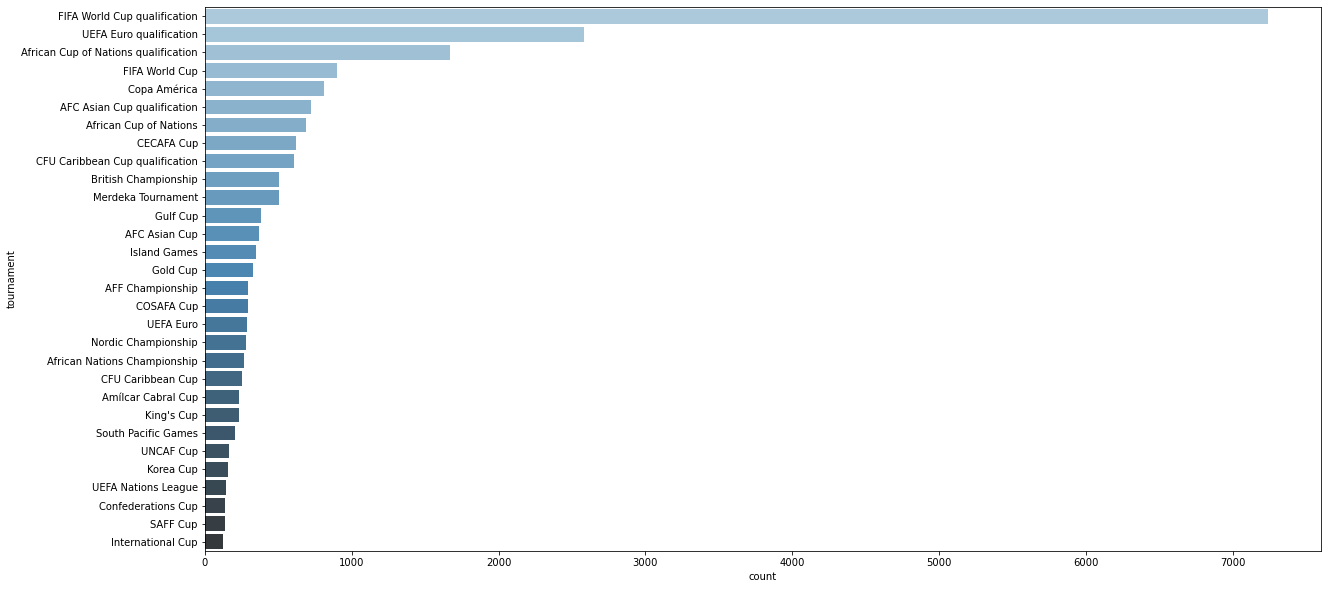

In [56]:
tournamentsortedtop = tournamentsorted[:30]
plt.figure(figsize=(20, 10))
sns.barplot(y=tournamentsortedtop.index,x='count',data=tournamentsortedtop,palette='Blues_d')

## Task 
Show the trend in number of matches per year.

In [57]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [59]:
df.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

In [60]:
import datetime as dt

df['date']=pd.to_datetime(df['date'],format='%Y-%m-%d')
df['year']=df['date'].dt.year
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876


In [62]:
nmatches = df.groupby('year')['date'].count()
nmatches = pd.DataFrame(nmatches)
nmatches = nmatches.rename(columns={"date":"count"})
nmatches.head()

,count
year,
1872,1
1873,1
1874,1
1875,1
1876,2


<AxesSubplot:xlabel='year', ylabel='count'>

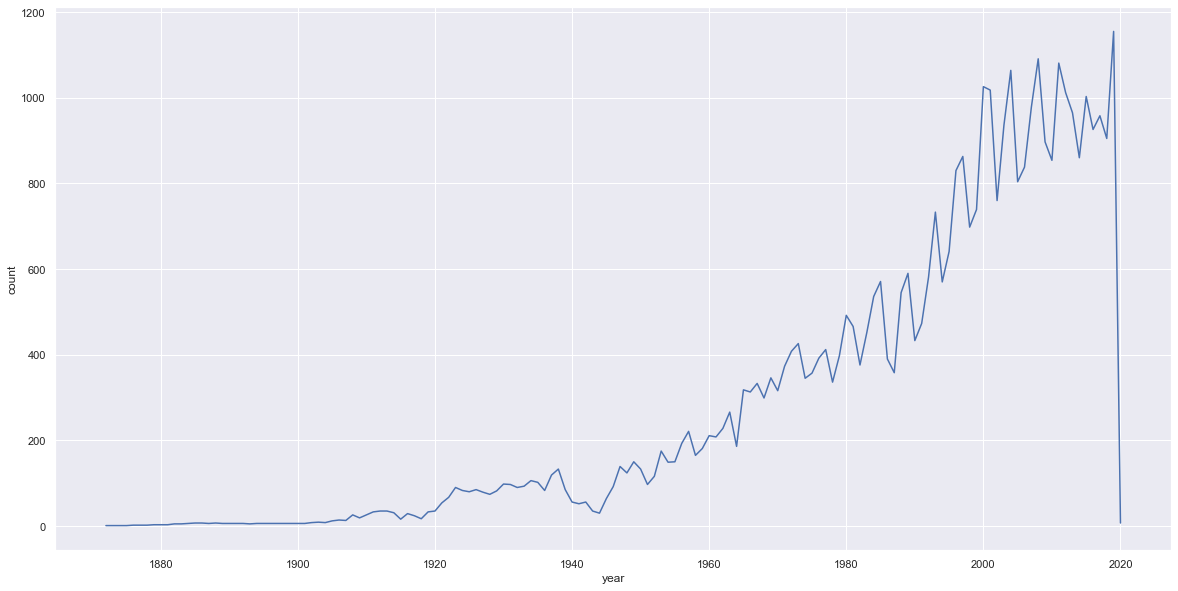

In [64]:
plt.figure(figsize=(20, 10))
sns.set_theme(style="darkgrid")

sns.lineplot(x=nmatches.index,y='count',data=nmatches)

## Task
Which teams are the most successful ones? (winning percentage)

In [65]:
winners_home = df[df['home_score']>df['away_score']]['home_team']
winners_away = df[df['away_score']>df['home_score']]['away_team']

In [69]:
winners_home.describe()

count      20234
unique       290
top       Brazil
freq         404
Name: home_team, dtype: object

In [70]:
winners_away.describe()

count       11774
unique        285
top       England
freq          264
Name: away_team, dtype: object

In [94]:
winners_home = df[df['home_score']>df['away_score']].groupby('home_team')['date'].count()
winners_home = pd.DataFrame(winners_home)
winners_home = winners_home.rename(columns={"date":"count"})
winners_home = winners_home.rename_axis('team')
winners_home.head()

,count
team,
Abkhazia,9
Afghanistan,17
Albania,62
Algeria,161
American Samoa,4


In [93]:
winners_away = df[df['away_score']>df['home_score']].groupby('away_team')['date'].count()
winners_away = pd.DataFrame(winners_away)
winners_away = winners_away.rename(columns={"date":"count"})
winners_away = winners_away.rename_axis('team')
winners_away.head()

,count
team,
Abkhazia,3
Afghanistan,13
Albania,22
Alderney,3
Algeria,53


In [121]:
winners = pd.concat([winners_home,winners_away])

In [122]:
winners = winners.groupby('team').sum()
winners.head()

,count
team,
Abkhazia,12
Afghanistan,30
Albania,84
Alderney,3
Algeria,214


In [119]:
winners.describe()

,count,total games
count,593.000000,593.000000
mean,107.920742,140.150084
std,123.022804,130.883508
min,1.000000,1.000000
25%,11.000000,22.000000
50%,57.000000,106.000000
75%,167.000000,227.000000
max,625.000000,568.000000


In [124]:
total_games_home = df.groupby(['home_team'])['date'].count()
total_games_away = df.groupby(['away_team'])['date'].count()
total_games = pd.concat([total_games_home,total_games_away])
total_games = pd.DataFrame(total_games)
total_games = total_games.rename_axis('team')
total_games = total_games.groupby('team').sum()
total_games = total_games.rename(columns={'date':'total games'})
total_games.head()

,total games
team,
Abkhazia,28
Afghanistan,111
Albania,332
Alderney,19
Algeria,505


In [126]:
total_games.describe()

,total games
count,312.000000
mean,266.576923
std,258.502030
min,1.000000
25%,34.000000
50%,200.000000
75%,449.250000
max,1018.000000


In [127]:
winners = winners.merge(total_games,on='team',validate='one_to_one')
winners.head()

,count,total games
team,,
Abkhazia,12,28
Afghanistan,30,111
Albania,84,332
Alderney,3,19
Algeria,214,505


In [133]:
winners['win %'] = winners['count']/winners['total games']
winners.head()

,count,total games,win %
team,,,
Abkhazia,12,28,0.428571
Afghanistan,30,111,0.270270
Albania,84,332,0.253012
Alderney,3,19,0.157895
Algeria,214,505,0.423762


<AxesSubplot:xlabel='win %', ylabel='team'>

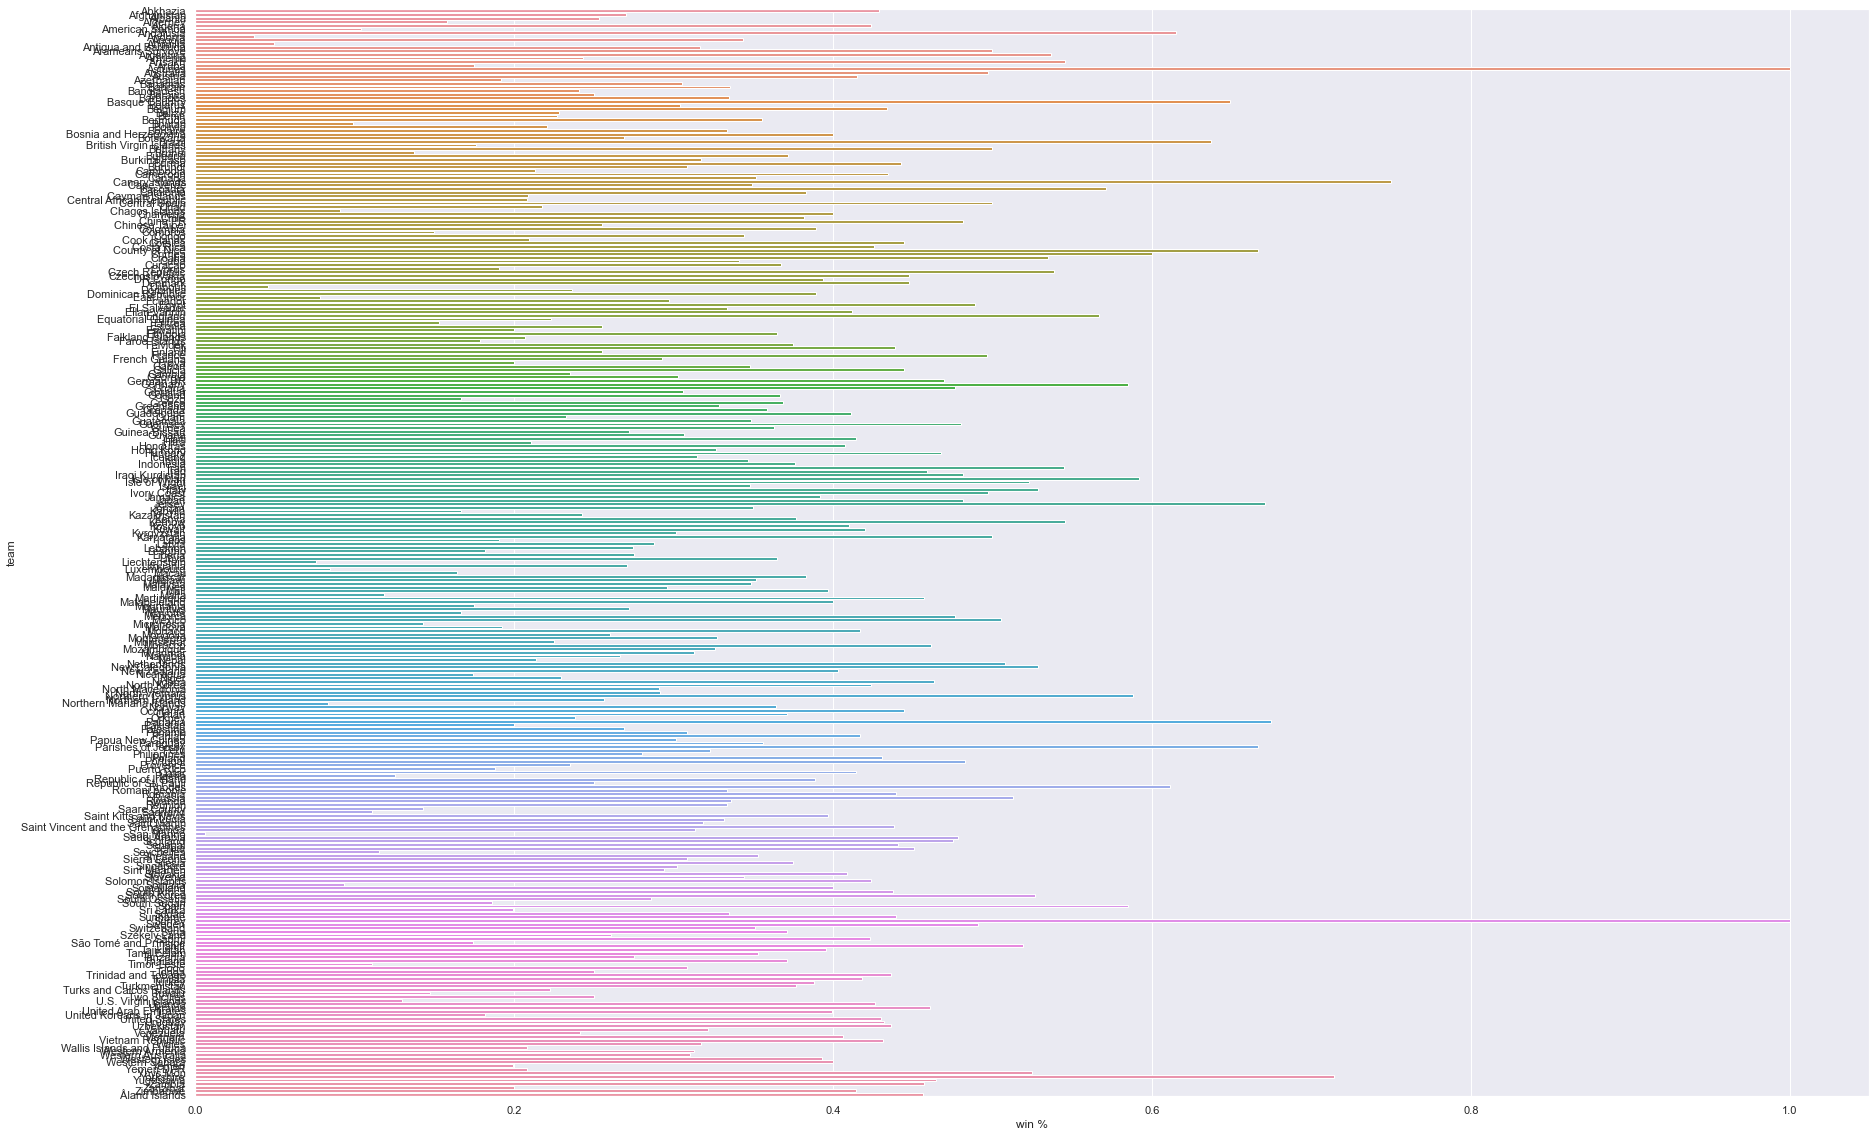

In [134]:
plt.figure(figsize=(30, 20))
sns.barplot(y=winners.index,x='win %',data=winners)

In [140]:
wsorted = winners['win %'].nlargest(10)
wsorted = pd.DataFrame(wsorted)
wsorted

,win %
team,
Asturias,1.000000
Surrey,1.000000
Canary Islands,0.750000
Yorkshire,0.714286
Padania,0.674419
Jersey,0.670732
County of Nice,0.666667
Parishes of Jersey,0.666667
Basque Country,0.649123


<AxesSubplot:xlabel='win %', ylabel='team'>

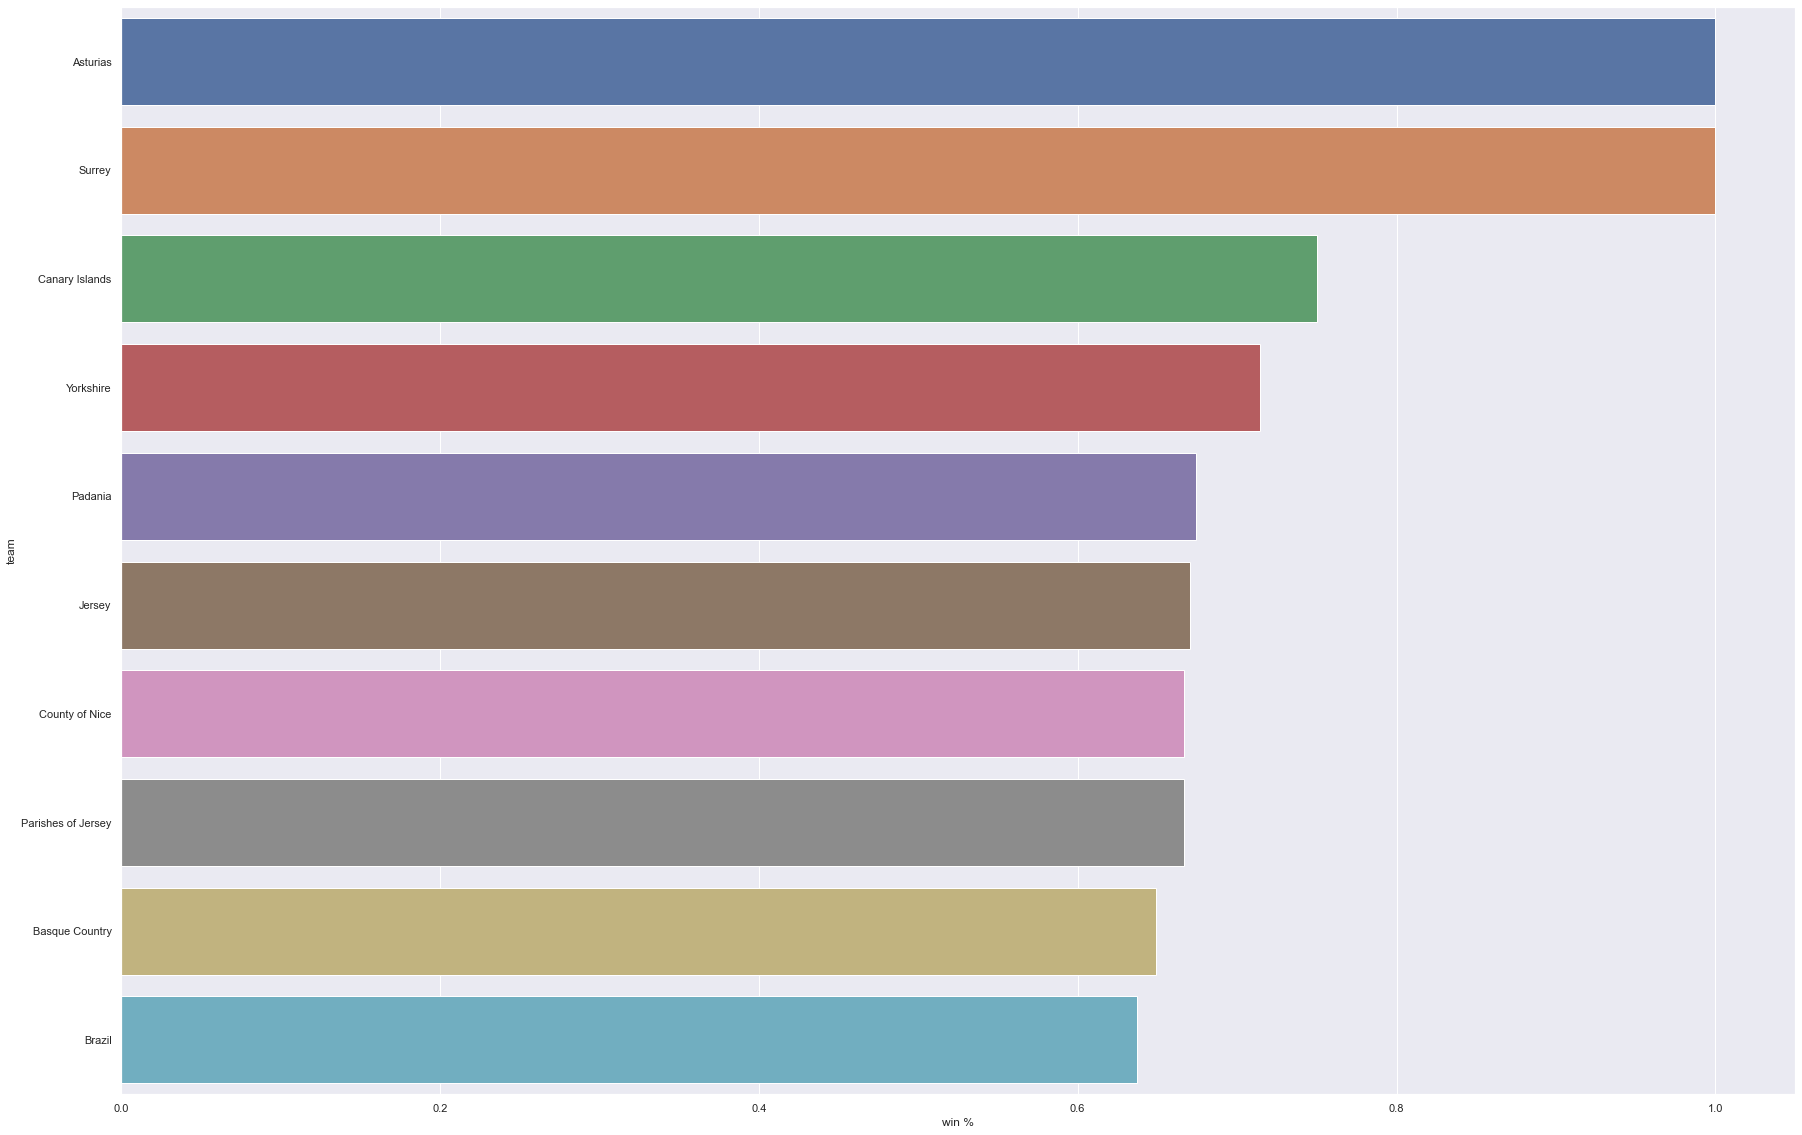

In [141]:
plt.figure(figsize=(30, 20))
sns.barplot(y=wsorted.index,x='win %',data=wsorted)

## Task
Which teams are the least successful ones? (winning percentage)

In [142]:
lsorted = winners['win %'].nsmallest(10)
lsorted = pd.DataFrame(lsorted)
lsorted

,win %
team,
San Marino,0.006135
Andorra,0.036585
Djibouti,0.045455
Anguilla,0.049180
Liechtenstein,0.075758
East Timor,0.078431
Northern Mariana Islands,0.083333
Luxembourg,0.084577
Chagos Islands,0.090909


<AxesSubplot:xlabel='win %', ylabel='team'>

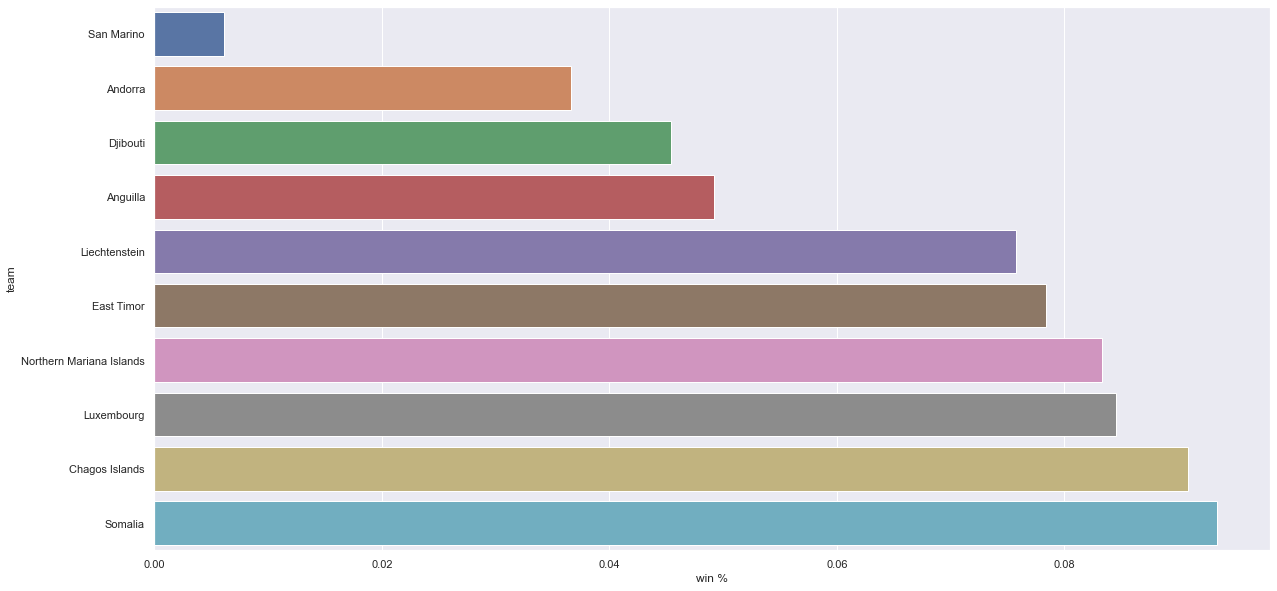

In [143]:
plt.figure(figsize=(20, 10))
sns.barplot(y=lsorted.index,x='win %',data=lsorted)

## Task
Which months through the history had more matches? Is it June, July, or others? Does the number of matches change from month to month?

In [144]:
df['month']=df['date'].dt.month
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,11
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,3
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,3
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875,3
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,3


In [145]:
nmmatches = df.groupby('month')['date'].count()
nmmatches = pd.DataFrame(nmmatches)
nmmatches = nmmatches.rename(columns={"date":"count"})
nmmatches.head()

,count
month,
1,2218
2,2564
3,4039
4,2538
5,3231


<AxesSubplot:xlabel='month', ylabel='count'>

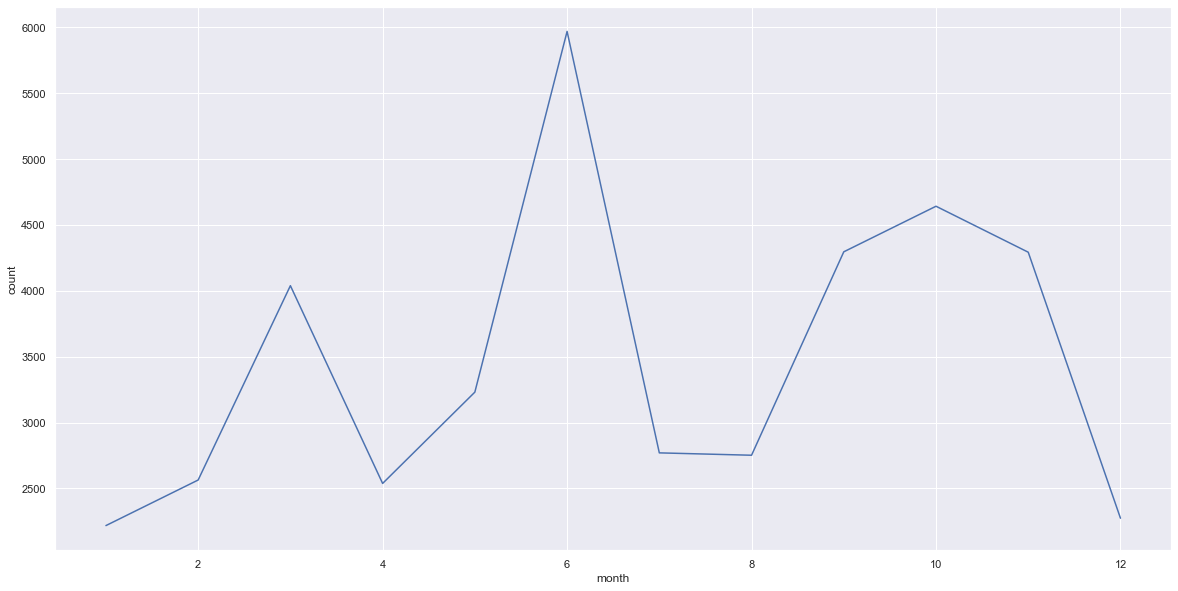

In [146]:
plt.figure(figsize=(20, 10))
sns.set_theme(style="darkgrid")

sns.lineplot(x=nmmatches.index,y='count',data=nmmatches)

In [ ]:
#june, then oct

## Task
Which teams played against each other the most?

In [182]:
df['game']=df[['home_team','away_team']].agg(' '.join,axis=1)
df['game'].head()

0    Scotland England
1    England Scotland
2    Scotland England
3    England Scotland
4    Scotland England
Name: game, dtype: object

In [173]:
dftest = df['game'].value_counts(sort=True).sort_index()
dftest.head()

Abkhazia Artsakh            1
Abkhazia Chagos Islands     1
Abkhazia Chameria           2
Abkhazia Kárpátalja         1
Abkhazia Northern Cyprus    2
Name: game, dtype: int64

In [169]:
dfgames = df.sort_values('game')
dfgames = dfgames.groupby('game')['date'].count()
dfgames = pd.DataFrame(dfgames)
dfgames = dfgames.rename(columns={'date':'count'})
dfgames = dfgames.sort_values('count',ascending=False)
dfgamestop = dfgames['count'].nlargest(10)
dfgamestop = pd.DataFrame(dfgamestop)

<AxesSubplot:xlabel='game', ylabel='count'>

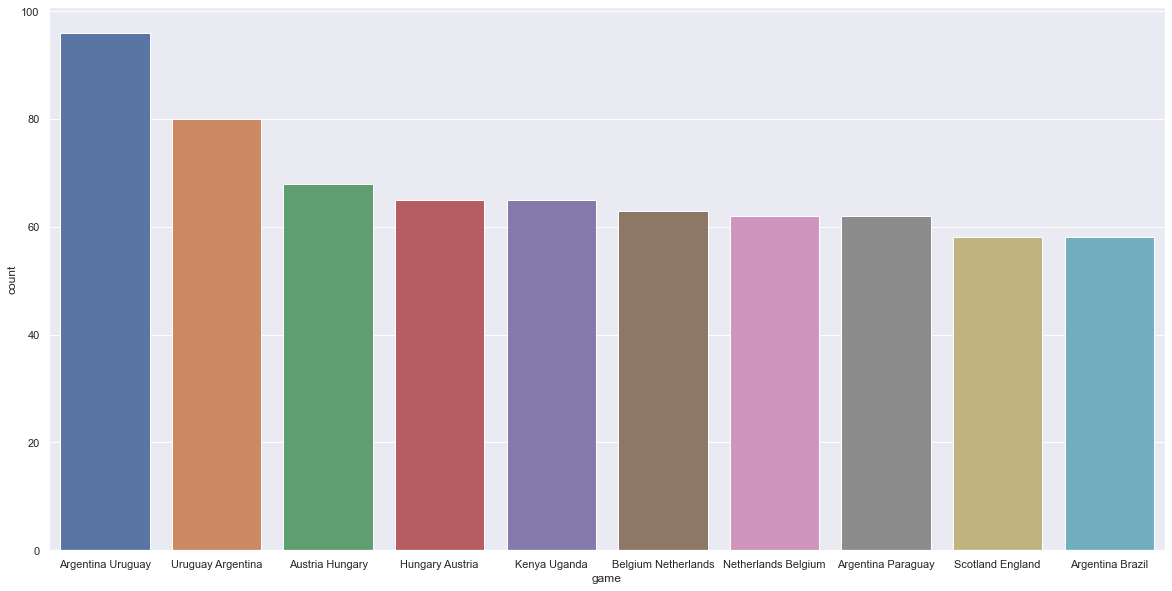

In [170]:
plt.figure(figsize=(20, 10))
sns.barplot(y='count',x=dfgamestop.index,data=dfgamestop)

## Task
Apply your creativity to show some additional insights from the data.

In [150]:
dfcity = df.groupby('city')['date'].count()
dfcity = pd.DataFrame(dfcity)
dfcity = dfcity.rename(columns={'date':'count'})
dfcity.head()

,count
city,
6th of October City,5
Aachen,2
Aalborg,7
Aarau,1
Aarhus,2


In [156]:
dfcitytop = dfcity.sort_values(by='count')['count'].nlargest(10)
dfcitytop = pd.DataFrame(dfcitytop)
dfcitytop.head()

,count
city,
Kuala Lumpur,589
Doha,459
Bangkok,427
London,395
Budapest,386


<AxesSubplot:xlabel='city', ylabel='count'>

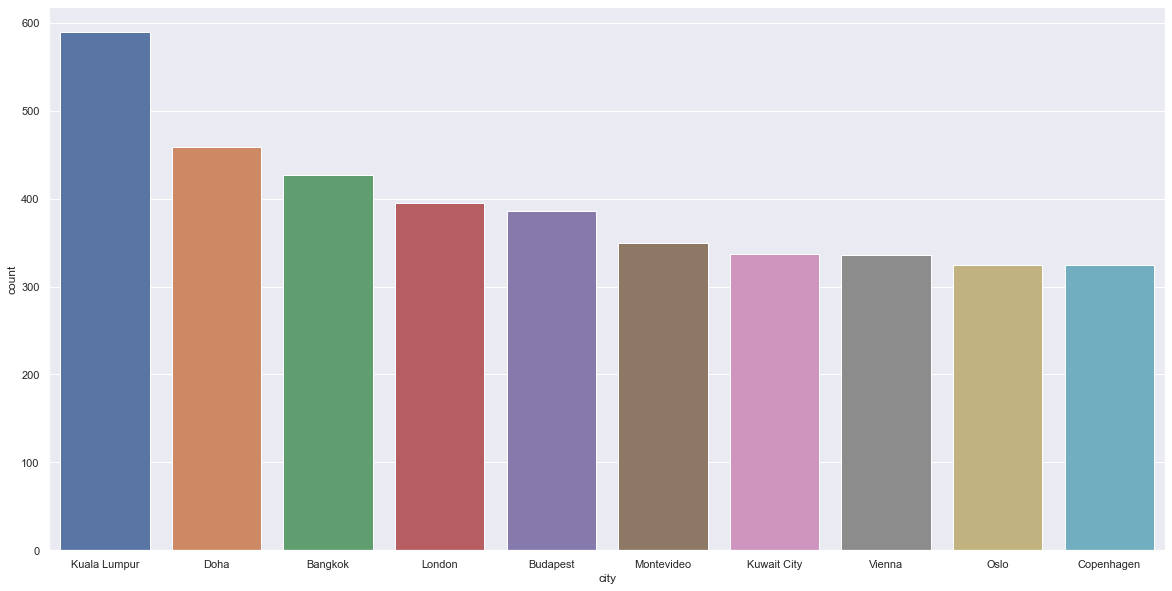

In [157]:
plt.figure(figsize=(20, 10))
sns.barplot(y='count',x=dfcitytop.index,data=dfcitytop)

## Task (Stretch)
Create these graphs in Tableau as well.